In [1]:
!pip install -Uqq ddgs fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5

In [2]:
# All necessary imports are included here
from ddgs.ddgs import DDGS
from fastcore.all import *
from fastai.vision.all import *
import time

# A function to search for image URLs using the new 'ddgs' library
def search_images(keywords, max_images=30):
    print(f"Searching for '{keywords}'...")
    # Using the DDGS class from the new library
    results = DDGS().images(keywords, max_results=max_images)
    return L(results).itemgot('image')

# Define the main folder for our data
path = Path('bird_or_not')

# --- Get Bird Images ---
bird_urls = search_images('bird photos', max_images=100)
dest_bird = path/'bird'
dest_bird.mkdir(exist_ok=True, parents=True)
print(f"Downloading {len(bird_urls)} bird images...")
download_images(dest_bird, urls=bird_urls)
time.sleep(2) # Adding a small pause to be polite to the server

# --- Get Forest Images ---
forest_urls = search_images('forest photos', max_images=100)
dest_forest = path/'forest'
dest_forest.mkdir(exist_ok=True, parents=True)
print(f"Downloading {len(forest_urls)} forest images...")
download_images(dest_forest, urls=forest_urls)

# --- Verify and Clean Up ---
print("Verifying images...")
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Removed {len(failed)} broken images.")

Searching for 'bird photos'...
Searching for 'forest photos'...
Verifying images...
Removed 6 broken images.


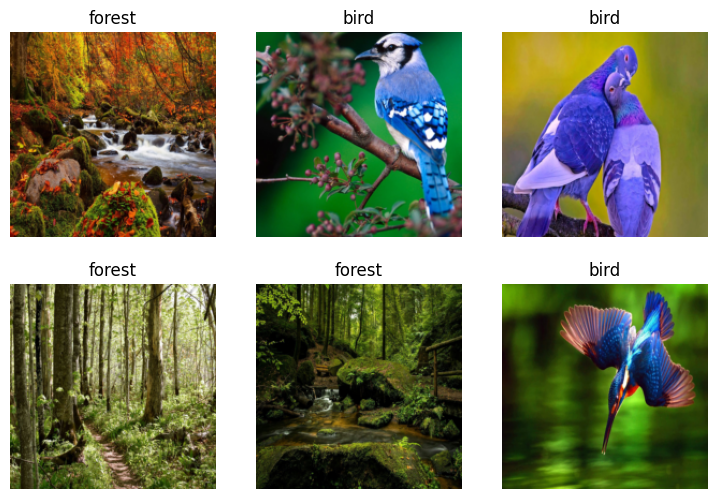

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

# This line shows a sample of your data to confirm it's correct
dls.show_batch(max_n=6)

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.992964,0.532071,0.250000,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.053147,0.038147,0.027778,00:25
1,0.033338,0.000569,0.000000,00:24
2,0.022013,0.000151,0.000000,00:27


In [12]:
# ===================================================================
# STEP 1: INSTALL EVERYTHING
# ===================================================================
print("STEP 1: Installing required libraries...")
!pip install -Uqq ddgs fastai
print("Installation complete.\n")

# ===================================================================
# STEP 2: IMPORT EVERYTHING AND DEFINE FUNCTIONS
# ===================================================================
print("STEP 2: Importing libraries and defining functions...")
from ddgs import DDGS  # Updated import for the new ddgs package
from fastcore.all import *
from fastai.vision.all import *
from fastai.vision.utils import download_url
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

def search_images(keywords, max_images=30):
    """A function to search for image URLs using the 'ddgs' library."""
    print(f"Searching for '{keywords}'...")
    results = DDGS().images(keywords, max_results=max_images)
    return L(results).itemgot('image')
print("Imports and functions are ready.\n")

# ===================================================================
# STEP 3: DOWNLOAD AND PREPARE DATA
# ===================================================================
print("STEP 3: Downloading and preparing image data...")
path = Path('bird_or_not')

# Get Bird Images
bird_urls = search_images('bird photos', max_images=100)
dest_bird = path/'bird'
dest_bird.mkdir(exist_ok=True, parents=True)
download_images(dest_bird, urls=bird_urls)
time.sleep(1)  # Small pause

# Get Forest Images
forest_urls = search_images('forest photos', max_images=100)
dest_forest = path/'forest'
dest_forest.mkdir(exist_ok=True, parents=True)
download_images(dest_forest, urls=forest_urls)

# Verify and Clean Up
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Data download and cleanup complete. Removed {len(failed)} broken images.\n")

# ===================================================================
# STEP 4: CREATE DATALOADERS
# ===================================================================
print("STEP 4: Creating DataLoaders...")
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
print("DataLoaders are ready.\n")

# ===================================================================
# STEP 5: TRAIN THE MODEL
# ===================================================================
print("STEP 5: Training the model... (This will take a few minutes)")
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)
print("Model training is complete.\n")

# ===================================================================
# STEP 6: TEST THE MODEL (INFERENCE)
# ===================================================================
print("STEP 6: Running a test prediction...")
# Get a new image that the model has never seen
urls = search_images('parrot photo', max_images=1)
dest = 'test_image.jpg'
download_url(urls[0], dest, show_progress=False)
print("Test image downloaded.")

# Load the image and make a prediction
img = PILImage.create(dest)
is_bird, _, probs = learn.predict(img)

# Print the final results
print("\n--- FINAL PREDICTION ---")
print(f"The model predicts this is a: {is_bird}.")
bird_prob = probs[learn.dls.vocab.o2i['bird']]
print(f"Probability it's a bird: {bird_prob:.4f}")
print("--- TASK COMPLETE ---")

STEP 1: Installing required libraries...
Installation complete.

STEP 2: Importing libraries and defining functions...
Imports and functions are ready.

STEP 3: Downloading and preparing image data...
Searching for 'bird photos'...
Searching for 'forest photos'...
Data download and cleanup complete. Removed 0 broken images.

STEP 4: Creating DataLoaders...
DataLoaders are ready.

STEP 5: Training the model... (This will take a few minutes)


epoch,train_loss,valid_loss,error_rate,time
0,0.247896,0.000005,0.000000,01:49


epoch,train_loss,valid_loss,error_rate,time
0,0.002872,0.000020,0.000000,01:48
1,0.002273,0.000006,0.000000,01:48
2,0.001657,0.000139,0.000000,01:49


Model training is complete.

STEP 6: Running a test prediction...
Searching for 'parrot photo'...
Test image downloaded.



--- FINAL PREDICTION ---
The model predicts this is a: bird.
Probability it's a bird: 1.0000
--- TASK COMPLETE ---
